# Практическая работа №2: Исследование задач о раскрасках

Выполнил студент группы 0391 Варик Александр

Цель работы: формирование представления о задачах о раскрасках, выработать умение использование леммы Бёрнсайда для решения задачи о раскрасках, привить навык использования систем компьютерной алгебры для реализации алгоритмов решения задачи.

Постановка задачи: аналитически решить задачу о раскрасках; графически отобразить решения задачи с использованием системы компьютерной алгебры SageMath. Полученные результаты содержательно проинтерпретировать.

Порядок выполнения работы

1. Аналитически решить задачу о раскрасках для заданного варианта. Все умозаключения в ходе решения обосновать и содержательно проинтерпретировать.
2. Реализовать средствами SageMath функцию, отображающую графически раскраску по заданному номеру. Продемонстрировать работу функции на нескольких примерах. Сделать выводы.
3. Для заданного варианта решить задачу в общем виде.

# Задание

# Основные теоретические сведения



# Симметрические группы

Пусть существует $M = ${$1,2,...,n$} - конечное множество из n элементов.

Группа $Sn = S(M)$ всех взаимно однозначных отображений множества $M$ на себя с операцией умножение (композиции) называется симметрической группой степени $n$.



# Циклы

Теорема. Каждая подстановка $σ≠e$ в $Sn$ является произведением независимых циклов (однозначно до порядка циклов).

Следствие. Порядок подстановки  равен НОК длин независимых циклов, входящих в разложение . Поядок подстановки является порядком циклической подгруппы $<σ>$.

Орбита элемента
Пусть $G$ - группа с нейтральным элементом $e$, а $X$ - какое-то множество.

Будем говорить, что $G$ действует на $X$, если задана операция, для $x∈X$ , и $g,h∈G$

Неподвижными точками элемента  называются точки , для которых . Множество неподвижных точек элемента $g$ обозначается $X^g$.

# Задача о раскрасках

Пусть $I$ - множество каких-то элементов, $C$ - множество цветов.
Раскраской множества $I$ называется функция $f:I->C$.

Множество всех раскрасок обозначается $C^I$.

Количество всех раскрасок равно $|C|^I$.

# Решение задачи

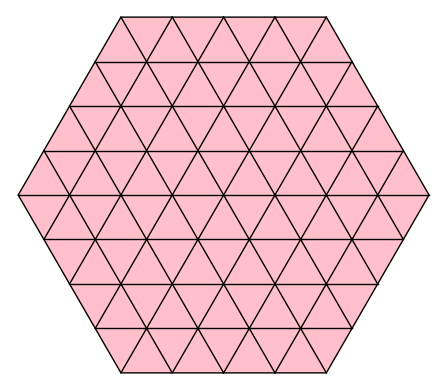

In [47]:
def draw_hexagon():
    a = 5
    h = sqrt(3)/2*a
    
    #задаем контур шестиугольнику
    g = Graphics()
    mark_points = [[-4*a, 0], [-2*a, 4*h],[2*a, 4*h], [4*a, 0], [2*a, -4*h], [-2*a, -4*h]]
    g += polygon(mark_points, color='pink', edgecolor='black')
    
    #внутренние линии

    g+=line([mark_points[0], mark_points[3]], color='black')
    g+=line([mark_points[1], mark_points[4]], color='black')
    g+=line([mark_points[2], mark_points[5]], color='black')   
    g+=line([[-2.5*a, 3*h], [2.5*a, 3*h]], color="black")
    g+=line([[-2.5*a, -3*h], [2.5*a, -3*h]], color="black")
    g+=line([[-3.5*a, h], [3.5*a, h]], color="black")
    g+=line([[-3*a, 2*h], [3*a, 2*h]], color='black')
    g+=line([[-3.5*a,-h], [3.5*a, -h]], color="black")
    g+=line([[-3*a, -2*h], [3*a, -2*h]], color='black')
    g+=line([[-3*a, -2*h], [-0*a, 4*h]], color="black")
    g+=line([[-2.5*a, -3*h], [1*a, 4*h]], color="black")
    g+=line([[2.5*a, 3*h], [-1*a, -4*h]], color="black")
    g+=line([[3*a, 2*h], [0*a, -4*h]], color="black")
    g+=line([[3.5*a, 1*h], [1*a, -4*h]], color="black")
    g+=line([[-1*a, 4*h], [-3.5*a, -1*h]], color="black") 
    g+=line([[-3*a, 2*h], [0*a, -4*h]], color="black")
    g+=line([[-2.5*a, 3*h], [1*a, -4*h]], color="black")
    g+=line([[2.5*a, -3*h], [-1*a, 4*h]], color="black")
    g+=line([[0*a, 4*h], [3*a, -2*h]], color="black")
    g+=line([[-1*a, -4*h], [-3.5*a, 1*h]], color="black")
    g+=line([[3.5*a, -1*h], [1*a, 4*h]], color="black")

    g.show(axes=false) 
draw_hexagon()

Идем по часовой стрелке и нумеруем узлы решеток, отстающие от точки А на 1, 2, 3, 4 единицы последовательно. Получили во внутреннем кольце 6 $(1...6)$ точек, во втором 12 $(7...18)$ точек, в третьем 18 $(19...36)$, а в четвертом 24$(37...60)$ точек.
Мы можем либо повернуть шестиугольник на 60 градусов по часовой стрелке ($τ$), либо отразить по оси OY($σ$)

Вычислим перестановку $τ$. Слои при повороте вокруг А не зависят друг от друга, их перестановки можно рассматривать отдельно. Перестановка первого слоя имеет вторую строку вида $(2, 3, 4, 5, 6, 1)$. Второго слоя - $(9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 7, 8)$. Нетрудно заметить, что для получения перестановки слоя $i$ нужно взять упорядоченный список его вершин и фрагмент списка из первых $i$ элементов переместить в конец.

In [66]:
#ввод количества сегментов
def rotation(segments):
    ans = []
    first_point = 1
    
    for i in range(1, segments+1):
        quantity = i * 6
        bunch = [j for j in range(first_point, quantity + first_point)]
        bunch = bunch[i::] + bunch[0:i:]
        ans = ans + bunch
        first_point =  first_point + quantity
    return ans

In [67]:
print(rotation(4))

[2, 3, 4, 5, 6, 1, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 7, 8, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 19, 20, 21, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 37, 38, 39, 40]


Теперь составим перестановку σ.
Точки каждого слоя обязательно отражаются в точки этого же слоя. Опять же слои можно рассматривать отдельно. Можно заметить, что перестановка сегментов с номером  получается следующим образом. Берём список номеров точек этого слоя разделим список на 2 части. В первую часть попадут первые $i+1$ элементов, во вторую остальные.

In [68]:
#функция принимает на вход желаемое количество слоёв
def reflection(segments):
    ans = []
    first_point = 1
    for i in range(1, segments + 1):
        quantity = i * 6
        bunch = [j for j in range(first_point, quantity + first_point)]
        top_point = i + 1
        left = bunch[0:top_point]
        left.reverse()
        right= bunch[top_point:]
        right.reverse()
        ans =ans + left + right
        first_point =first_point + quantity
    
    return ans

In [69]:
print("Перестановка σ:")
print_permutation(reflection(4))

Перестановка σ:
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 
 2  1  6  5  4  3  9  8  7 18 17 16 15 14 13 12 11 10 22 21 20 19 36 35 34 33 32 31 30 29 28 27 26 25 24 23 41 40 39 38 37 60 59 58 57 56 55 54 53 52 51 50 49 48 47 46 45 44 43 42 



Разложим перестановку.

In [70]:
import copy

def perm_to_cycles(perm):
    perm_copy = copy.deepcopy(perm)
    ans = []
    
    for i in range(1, len(perm_copy)):
        if perm_copy[i-1] == -1:
            continue
        begin = i
        cur = perm_copy[i - 1]
        ans.append([begin])
        while cur != begin:
            ans[-1].append(cur)
            next = perm_copy[cur - 1]
            perm_copy[cur - 1] = -1
            cur = next
        ans[-1] = tuple(ans[-1])
    return ans

#вывод
def print_cycled_permutation(cycled_perm):
    for cycle in cycled_perm:
        print('(', end=" ")
        for digit in cycle:
            print(digit, end=" ")
        print(')', end=" ")
    print()

Далее найдем все возможные варианты поворотов как по осям, так и по отражениям

In [73]:
e=[]
for i in range(1, 62):
    e.append(i)
e = perm_to_cycles(e)
e_cycled = PermutationGroupElement(e)

tau_cycled = PermutationGroupElement(perm_to_cycles(rotation(4)))
sigma_cycled = PermutationGroupElement(perm_to_cycles(reflection(4)))

#вычислим все степени перестановки τ
tau2_cycled = tau_cycled * tau_cycled
tau3_cycled = tau2_cycled * tau_cycled
tau4_cycled = tau3_cycled * tau_cycled
tau5_cycled = tau4_cycled * tau_cycled


#вычислим στ, στ^2 и так далее
sigma_tau_cycled = sigma_cycled * tau_cycled
sigma_tau2_cycled = sigma_cycled * tau2_cycled
sigma_tau3_cycled = sigma_cycled * tau3_cycled
sigma_tau4_cycled = sigma_cycled * tau4_cycled
sigma_tau5_cycled = sigma_cycled * tau5_cycled


#Выведем всё на экран
print('e =')
print(e_cycled.cycle_tuples(singletons=true))
print(' ' * 100)
print('τ =')
print(tau_cycled.cycle_tuples(singletons=true))
print(' ' * 100)
print('τ^2 =')
print(tau2_cycled.cycle_tuples(singletons=true))
print(' ' * 100)
print('τ^3 =')
print(tau3_cycled.cycle_tuples(singletons=true))
print(' ' * 100)
print('τ^4 =')
print(tau4_cycled.cycle_tuples(singletons=true))
print(' ' * 100)
print('τ^5 =')
print(tau5_cycled.cycle_tuples(singletons=true))
print(' ' * 100)
print('σ =')
print(sigma_cycled.cycle_tuples(singletons=true))
print(' ' * 100)
print('στ =')
print(sigma_tau_cycled.cycle_tuples(singletons=true))
print(' ' * 100)
print('στ^2 =')
print(sigma_tau2_cycled.cycle_tuples(singletons=true))
print(' ' * 100)
print('στ^3 =')
print(sigma_tau3_cycled.cycle_tuples(singletons=true))
print(' ' * 100)
print('στ^4 =')
print(sigma_tau4_cycled.cycle_tuples(singletons=true))
print(' ' * 100)
print('στ^5 =')
print(sigma_tau5_cycled.cycle_tuples(singletons=true))

e =
[(1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,), (11,), (12,), (13,), (14,), (15,), (16,), (17,), (18,), (19,), (20,), (21,), (22,), (23,), (24,), (25,), (26,), (27,), (28,), (29,), (30,), (31,), (32,), (33,), (34,), (35,), (36,), (37,), (38,), (39,), (40,), (41,), (42,), (43,), (44,), (45,), (46,), (47,), (48,), (49,), (50,), (51,), (52,), (53,), (54,), (55,), (56,), (57,), (58,), (59,), (60,)]
                                                                                                    
τ =
[(1, 2, 3, 4, 5, 6), (7, 9, 11, 13, 15, 17), (8, 10, 12, 14, 16, 18), (19, 22, 25, 28, 31, 34), (20, 23, 26, 29, 32, 35), (21, 24, 27, 30, 33, 36), (37, 41, 45, 49, 53, 57), (38, 42, 46, 50, 54, 58), (39, 43, 47, 51, 55, 59), (40, 44, 48, 52, 56, 60)]
                                                                                                    
τ^2 =
[(1, 3, 5), (2, 4, 6), (7, 11, 15), (8, 12, 16), (9, 13, 17), (10, 14, 18), (19, 25, 31), (20, 26, 32), (21, 27, 33), (2

Теперь мы можем посчитать общее количество циклов для перестановок

In [74]:
print("х^e=", len(e_cycled.cycle_tuples(singletons=true)))
print("х^τ=", len(tau_cycled.cycle_tuples(singletons=true)))
print("х^(τ^2)=", len(tau2_cycled.cycle_tuples(singletons=true)))
print("х^(τ^3)=", len(tau3_cycled.cycle_tuples(singletons=true)))
print("х^(τ^4)=", len(tau4_cycled.cycle_tuples(singletons=true)))
print("х^(τ^5)=", len(tau5_cycled.cycle_tuples(singletons=true)))
print("х^σ=", len(sigma_cycled.cycle_tuples(singletons=true)))
print("х^στ=", len(sigma_tau_cycled.cycle_tuples(singletons=true)))
print("х^(στ^2)=", len(sigma_tau2_cycled.cycle_tuples(singletons=true)))
print("х^(στ^3)=", len(sigma_tau3_cycled.cycle_tuples(singletons=true)))
print("х^(στ^4)=", len(sigma_tau4_cycled.cycle_tuples(singletons=true)))
print("х^(στ^5)=", len(sigma_tau5_cycled.cycle_tuples(singletons=true)))


х^e= 60
х^τ= 10
х^(τ^2)= 20
х^(τ^3)= 30
х^(τ^4)= 20
х^(τ^5)= 10
х^σ= 32
х^στ= 34
х^(στ^2)= 32
х^(στ^3)= 34
х^(στ^4)= 32
х^(στ^5)= 34


Применяя лемму Бернсайда мы получаем количество перестановок

In [75]:
print("В итоге имеем N =", 1/12*(4^60+4^10+4^20+4^30+4^20+4^10+4^32+4^34+4^32+4^34+4^32+4^34))

В итоге имеем N = 110768999648743067903389876924973056


__Реализовать средствами SageMath функцию, отображающую графически раскраску по заданному номеру.__

Отнимем от номера раскраски единицу, переведём полученное число в систему счисления по основанию 4, получим список цифр. Если нужно, добавим незначащие нули. Каждая цифра полученного числа определяет цвет точки.

In [76]:
import random

def k(num):
    fourth_num = num.digits(4)
    ans = [0] * (64-len(fourth_num)) + fourth_num
    return ans

def get_colouring(num):
    if num < 1 or num > 4^64:
        return None
    num -= 1
    return k(num)


def writting(num):
    
    a = 5
    h = sqrt(3)/2*a
    
    #cоздаем шестиугольник
    g = Graphics()
    mark_points = [[-4*a, 0], [-2*a, 4*h],[2*a, 4*h], [4*a, 0], [2*a, -4*h], [-2*a, -4*h]]
    g += polygon2d(mark_points, color='black', fill=False)
    
    #задаем цвета отметкам
    key = get_colouring(num)
    colors = ["blue", "red", "pink", "purple"]
    points_lst = []
    
    g+=line([mark_points[0], mark_points[3]], color='black')
    g+=line([mark_points[1], mark_points[4]], color='black')
    g+=line([mark_points[2], mark_points[5]], color='black')
    
    #горизонтальные линии
    g+=line([[-2.5*a, 3*h], [2.5*a, 3*h]], color="black")
    g+=line([[-2.5*a, -3*h], [2.5*a, -3*h]], color="black")
    g+=line([[-3.5*a, h], [3.5*a, h]], color="black")
    g+=line([[-3*a, 2*h], [3*a, 2*h]], color='black')
    g+=line([[-3.5*a,-h], [3.5*a, -h]], color="black")
    g+=line([[-3*a, -2*h], [3*a, -2*h]], color='black')
    
    #остальные линии
    g+=line([[-3*a, -2*h], [-0*a, 4*h]], color="black")
    g+=line([[-2.5*a, -3*h], [1*a, 4*h]], color="black")
    g+=line([[2.5*a, 3*h], [-1*a, -4*h]], color="black")
    g+=line([[3*a, 2*h], [0*a, -4*h]], color="black")
    g+=line([[3.5*a, 1*h], [1*a, -4*h]], color="black")
    g+=line([[-1*a, 4*h], [-3.5*a, -1*h]], color="black")
    
    g+=line([[-3*a, 2*h], [0*a, -4*h]], color="black")
    g+=line([[-2.5*a, 3*h], [1*a, -4*h]], color="black")
    g+=line([[2.5*a, -3*h], [-1*a, 4*h]], color="black")
    g+=line([[0*a, 4*h], [3*a, -2*h]], color="black")
    g+=line([[-1*a, -4*h], [-3.5*a, 1*h]], color="black")
    g+=line([[3.5*a, -1*h], [1*a, 4*h]], color="black")
    
   
    
    
    #углы 
    points_lst.append([-2*a, 4*h])
    points_lst.append([2*a, 4*h])
    points_lst.append([-2*a, -4*h])
    points_lst.append([2*a, -4*h])
    points_lst.append([-4*a, 0])
    points_lst.append([4*a, 0])   
    
    #внутренние точки
    points_lst.append([a, 0])
    points_lst.append([2*a, 0])
    points_lst.append([3*a, 0])
    points_lst.append([-a, 0])
    points_lst.append([-2*a, 0])
    points_lst.append([-3*a, 0])
    points_lst.append([-0.5*a, 3*h])
    points_lst.append([0.5*a, 3*h])
    points_lst.append([-0.5*a, -3*h])
    points_lst.append([0.5*a, -3*h])
    points_lst.append([-2.5*a, h])
    points_lst.append([-2.5*a, -h])
    points_lst.append([-2*a, -2*h])
    points_lst.append([-2*a, 2*h])
    points_lst.append([2*a, -2*h])
    points_lst.append([2*a, 2*h])
    points_lst.append([2.5*a, h])
    points_lst.append([2.5*a, -h]) 
    points_lst.append([1.5*a, h])
    points_lst.append([1.5*a, -h])
    points_lst.append([1*a, 2*h])
    points_lst.append([1*a, -2*h])
    points_lst.append([0.5*a, h])
    points_lst.append([0.5*a, -h])
    points_lst.append([0, 2*h])
    points_lst.append([0, -2*h]) 
    points_lst.append([-0.5*a, -h])
    points_lst.append([-0.5*a, h])
    points_lst.append([1.5*a, 3*h])
    points_lst.append([-1.5*a, 3*h])
    points_lst.append([1.5*a, -3*h])
    points_lst.append([-1.5*a, -3*h])
    points_lst.append([-1.5*a, h])
    points_lst.append([-1.5*a, -h])
    points_lst.append([-1*a, 2*h])
    points_lst.append([-1*a, -2*h])
    points_lst.append([-0.5*a, h])
    points_lst.append([-0.5*a, -h])
    points_lst.append([0, 2*h])
    points_lst.append([0, -2*h])  
    
    #точки на границах
    #точки снизу
    points_lst.append([a, -4*h])
    points_lst.append([0, -4*h])
    points_lst.append([-a, -4*h])
    
    #точки сверху
    points_lst.append([a, 4*h])
    points_lst.append([0, 4*h])
    points_lst.append([-a, 4*h])
    
    #точки сверху, справо
    points_lst.append([2.5*a, 3*h])
    points_lst.append([3*a, 2*h])
    points_lst.append([3.5*a, h])
    
    #точки сверху, слево
    points_lst.append([-2.5*a, 3*h])
    points_lst.append([-3*a, 2*h])
    points_lst.append([-3.5*a, h])
    
    #точки снизу, слево
    points_lst.append([-2.5*a, -3*h])
    points_lst.append([-3*a, -2*h])
    points_lst.append([-3.5*a, -h])
    
    #точки снизу, справо
    points_lst.append([2.5*a, -3*h])
    points_lst.append([3*a, -2*h])
    points_lst.append([3.5*a, -h])
    
    for i in range(0, 64):
        g+= point(points_lst[i], color = colors[key[i]], size = 300)
    g.show(axes=false)

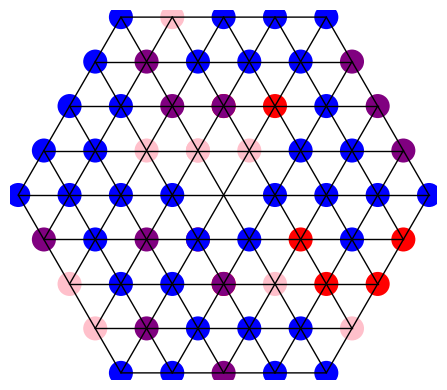

In [77]:
writting(110768999648743898764973058)